In [2]:
library(forecast)

In [5]:
births <- scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")

In [7]:
ts_birth<-ts(births, frequency = 12, start=c(1946,1))
ts_birth

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,26.663,23.598,26.931,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870
1947,21.439,21.089,23.709,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073
1948,21.937,20.035,23.590,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573
1949,21.548,20.000,22.424,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025
1950,22.604,20.894,24.677,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991
1951,23.287,23.049,25.076,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981
1952,23.798,22.270,24.775,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707
1953,24.364,22.644,25.565,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180
1954,24.657,23.304,26.982,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688
1955,24.990,24.239,26.721,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881


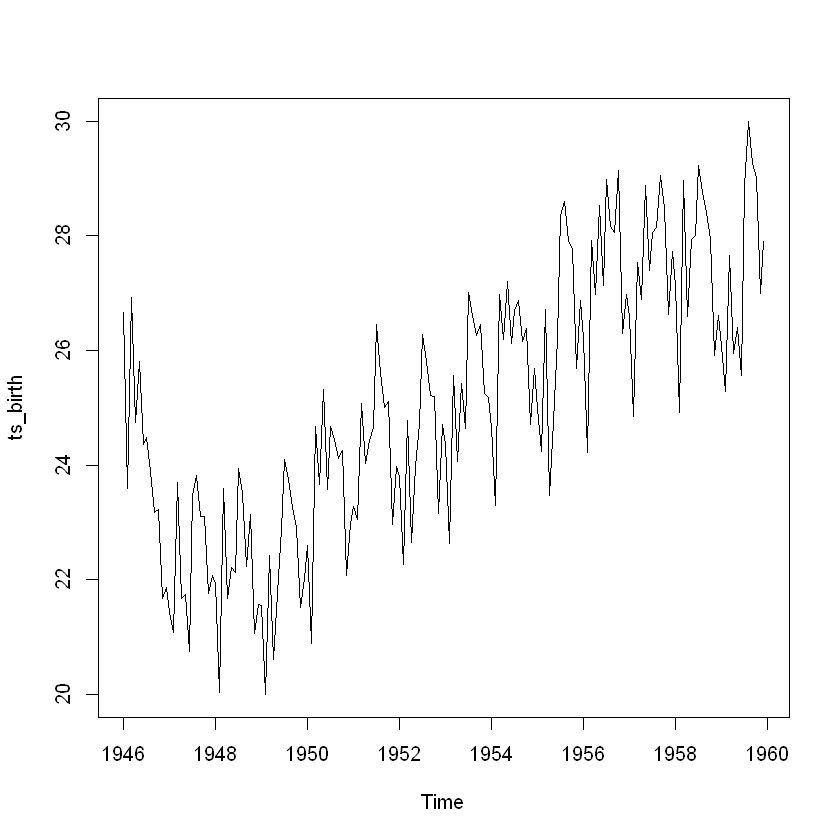

In [8]:
# 1. 원데이터 정상성 검정
plot(ts_birth)

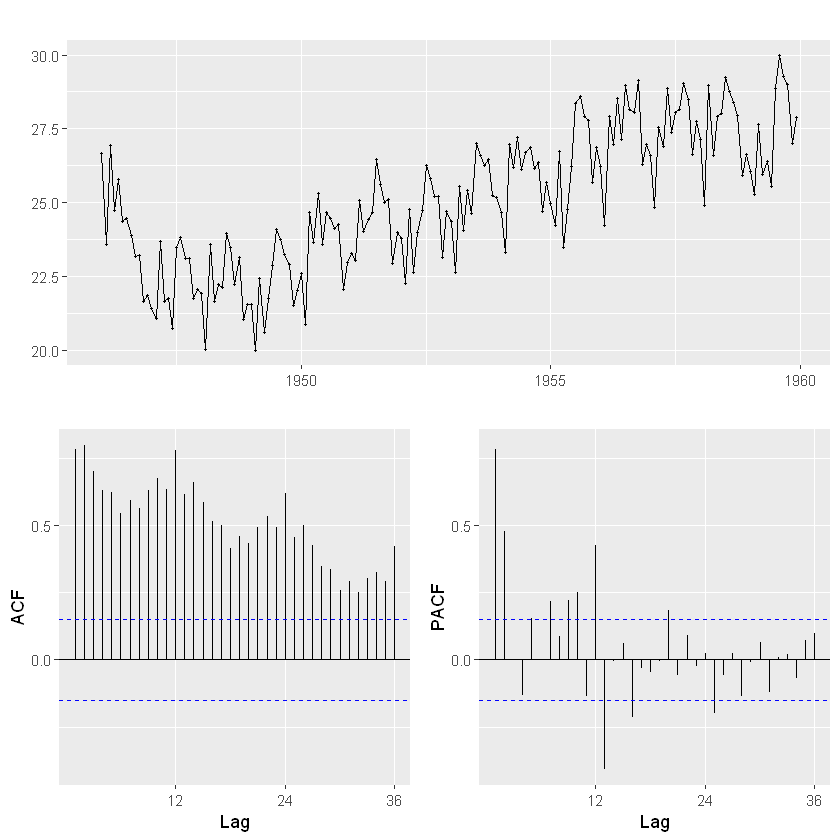

In [9]:
# ggtsdisplay함수로 ACF, PACF함수 그래프 관찰
ggtsdisplay(ts_birth)

In [10]:
# KPSS검정으로 정상시계열인지 확인하기
library(urca)
summary(ur.kpss(ts_birth))

# 검저통계량(임계치값)이 1pct의 임계치보다 크므로 귀무가설(정상시계열이다) 기각! 즉, 해당 데이터는 비정상시계열


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 2.7644 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.0738 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


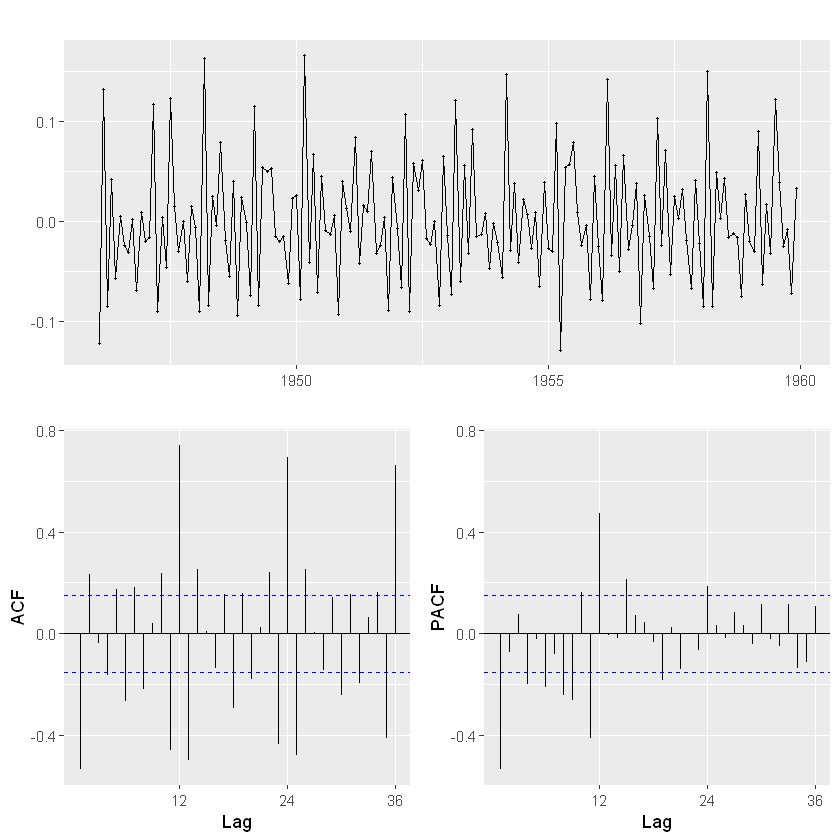

In [20]:
# 분산을 안정화시켜주고 차분해볼까?
log_diff_ts<-diff(log(ts_birth))
ggtsdisplay(log_diff_ts)
summary(ur.kpss(log_diff_ts))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.0735 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


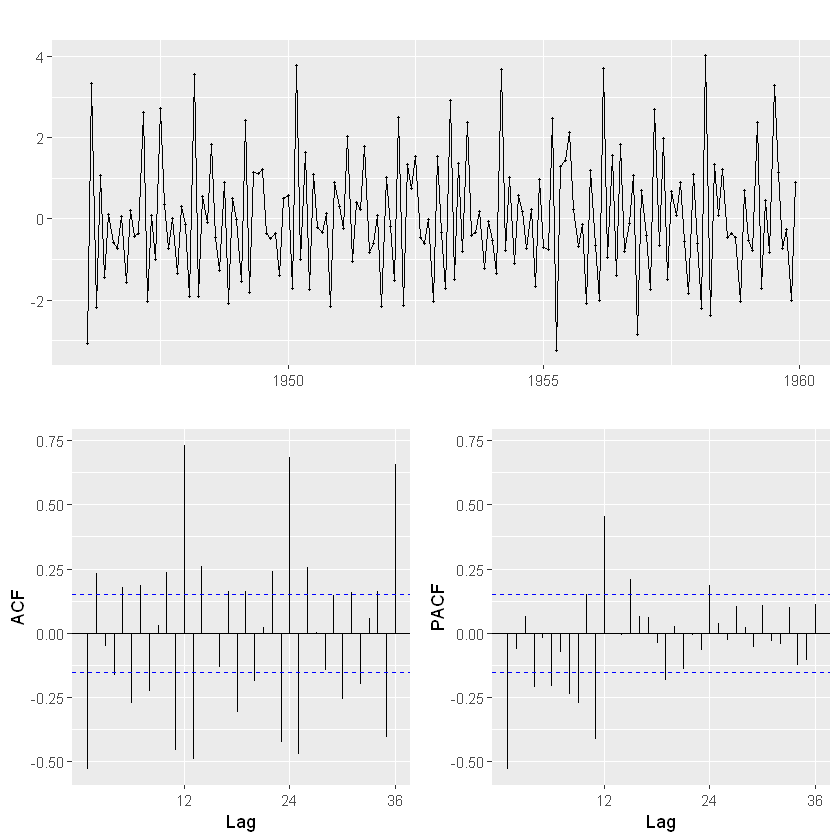

In [13]:
# 그래서 원데이터 1번 차분해서 살펴보기
ggtsdisplay(diff(ts_birth))
summary(ur.kpss(diff(ts_birth)))

# 해당 검정통계량(임계치값)이 1pct의 임계치값보다 낮으므로 귀무가설 채택!(1번 차분한 데이터는 정상성이다!)

In [23]:
# 계절적 차분이랑 일반차분 적정횟수 알아보기
nsdiffs(ts_birth)
ndiffs(ts_birth)

[1] 1

[1] 1

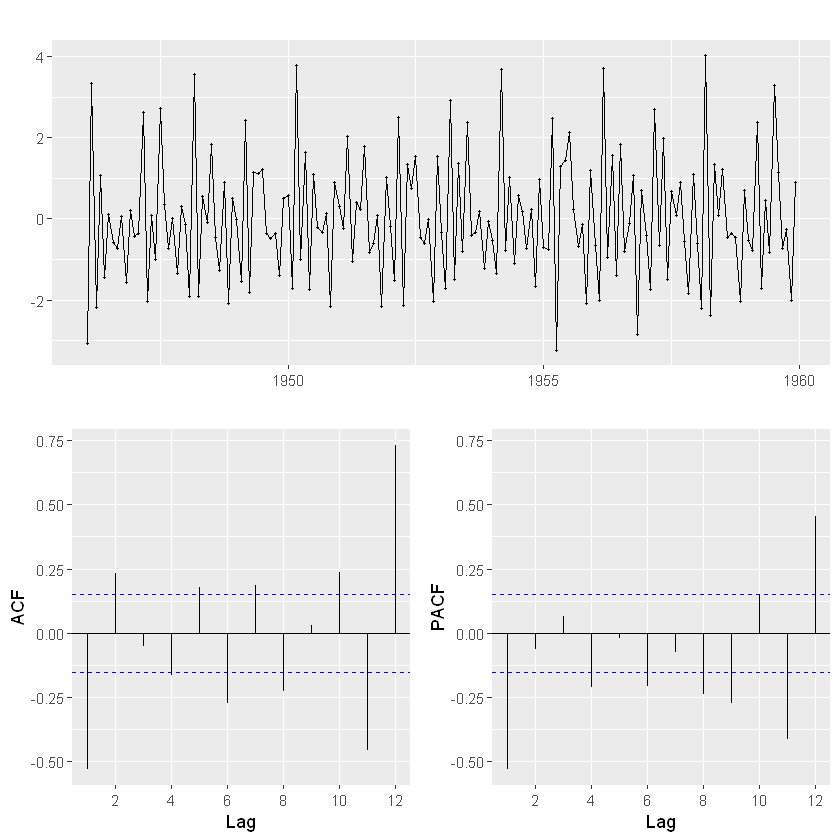

In [25]:
# 일반차분 1번한 데이터에다가 계절적 차분(m=12) 1번 추가 시행하기
ggtsdisplay(diff(ts_birth), lag=12)

In [26]:
# ACF함수에서 lag=12에서 팍 한 번 튀었기 때문에 계절적 MA(1)
# ACF함수에서 일반적으로 2번~3번 크게 튀었기 때문에 일반 MA(2) or MA(3)

# PACF함수에서 lag=12에서 팍 한 번 튀었기 때문에 계절적 AR(1)
# PACF함수에서 일반적으로 2번~3번 크게 팍 튀었기 때문에 일반 AR(2) or AR(3)

# 일반차분 1회, 계절차분 1회한 상태

# 모델후보정리
# ㄱ. ARIMA(2,1,2) SARIMA(1,1,1)
# ㄴ. ARIMA(2,1,3) SARIMA(1,1,1)
# ㄷ. ARIMA(3,1,2) SARIMA(1,1,1)
# ㄹ. ARIMA(3,1,3) SARIMA(1,1,1)

In [32]:
# ㄱ모델
fit_1<-Arima(ts_birth, order=c(2,1,2), seasonal=c(1,1,1))
# ㄴ모델
fit_2<-Arima(ts_birth, order=c(2,1,3), seasonal=c(1,1,1))
# ㄷ모델
fit_3<-Arima(ts_birth, order=c(3,1,2), seasonal=c(1,1,1))
# ㄹ모델
#fit_4<-Arima(ts_birth, order=c(3,1,3), seasonal=c(1,1,1))

# RMSE값과 AICC값 살펴보기
summary(fit_1)
summary(fit_2)
summary(fit_3)
#summary(fit_4)

Series: ts_birth 
ARIMA(2,1,2)(1,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     ma2     sar1     sma1
      0.6539  -0.4540  -0.7255  0.2532  -0.2427  -0.8451
s.e.  0.3004   0.2429   0.3228  0.2879   0.0985   0.0995

sigma^2 estimated as 0.4076:  log likelihood=-157.45
AIC=328.91   AICc=329.67   BIC=350.21

Training set error measures:
                    ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.1273882 0.6012674 0.4578678 0.5110816 1.823201 0.4841123
                    ACF1
Training set -0.04405169
Series: ts_birth 
ARIMA(2,1,3)(1,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     ma2     ma3     sar1     sma1
      1.5624  -0.6573  -1.6337  0.5391  0.2099  -0.2794  -0.8599
s.e.  0.1336   0.1369   0.1471  0.2412  0.1098   0.0989   0.0981

sigma^2 estimated as 0.4015:  log likelihood=-156.44
AIC=328.87   AICc=329.86   BIC=353.22

Training set error measures:
                    ME      RMSE       MAE       MPE     MAPE      MASE
Training


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)(1,1,1)[12]
Q* = 24.987, df = 18, p-value = 0.1253

Model df: 6.   Total lags used: 24



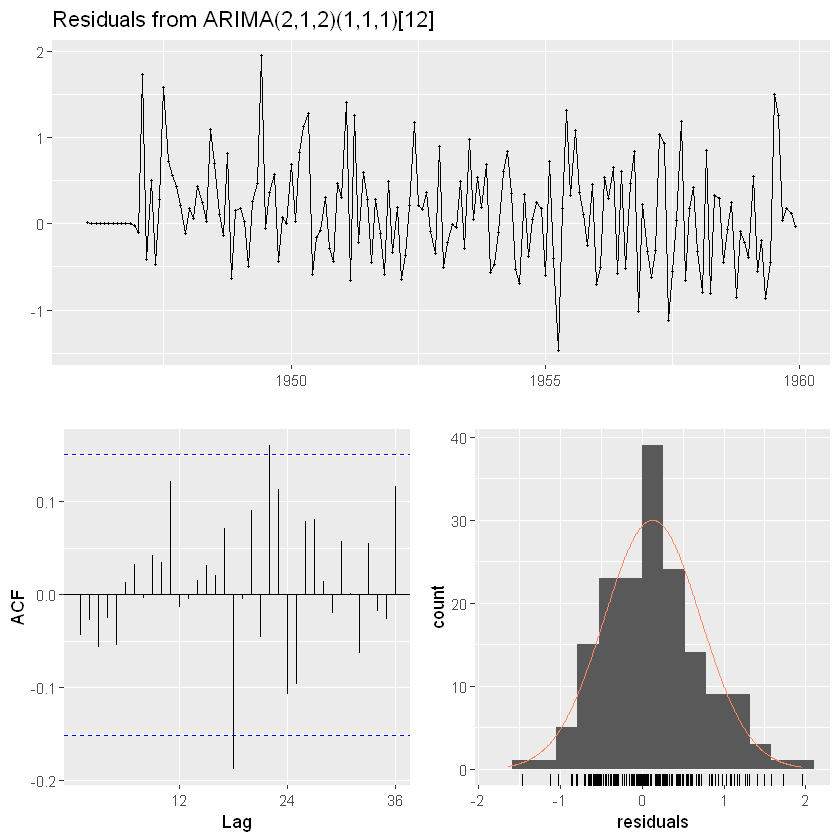


	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)(1,1,1)[12]
Q* = 25.095, df = 17, p-value = 0.09259

Model df: 7.   Total lags used: 24



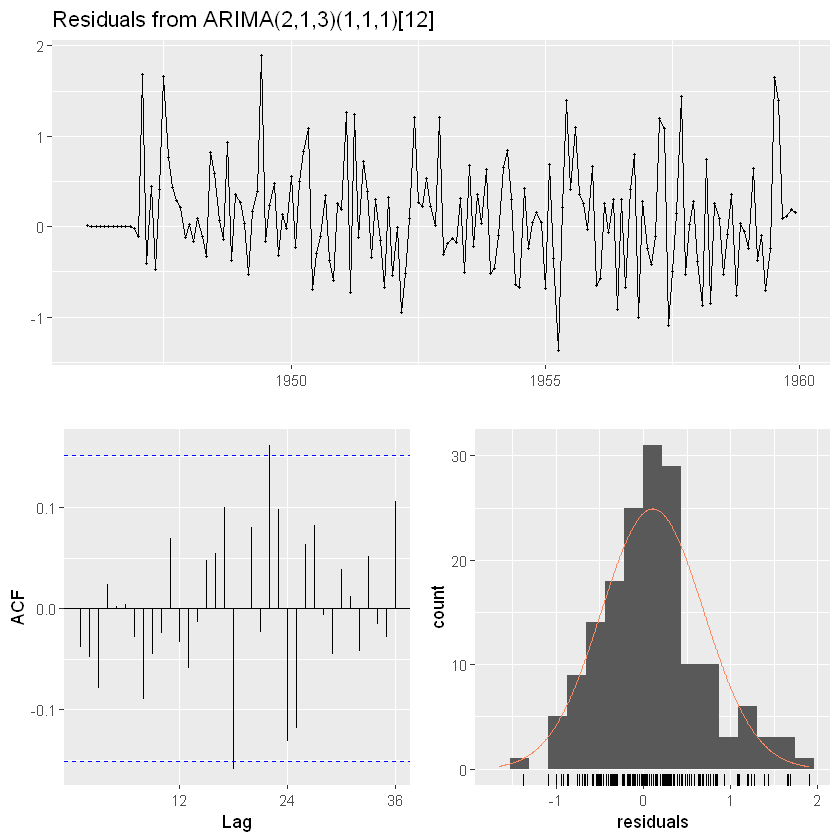


	Ljung-Box test

data:  Residuals from ARIMA(3,1,2)(1,1,1)[12]
Q* = 25.106, df = 17, p-value = 0.09235

Model df: 7.   Total lags used: 24



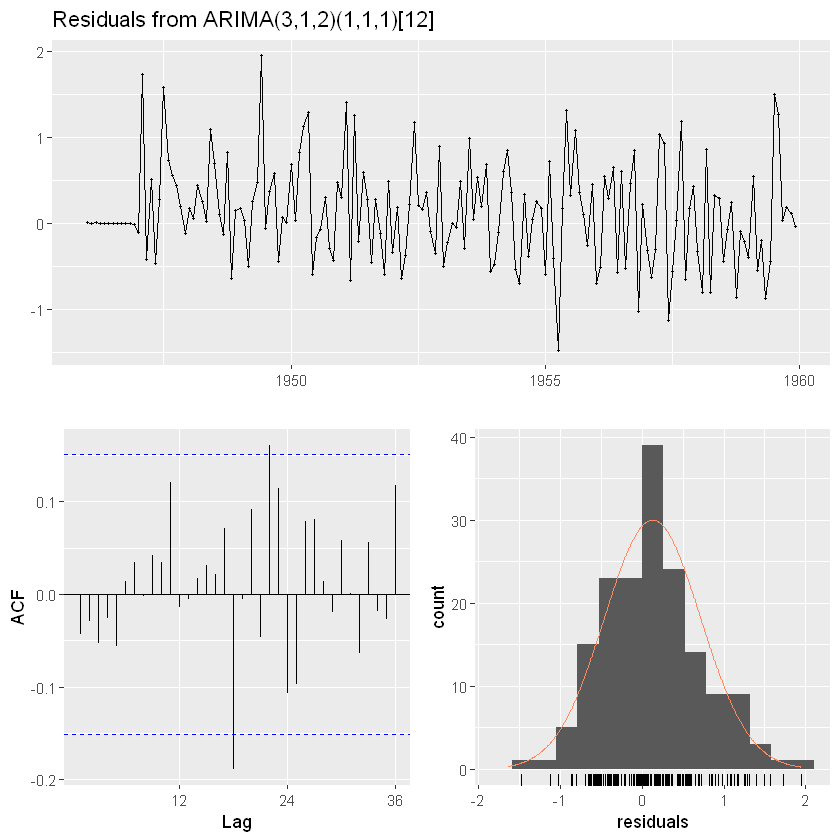

In [34]:
checkresiduals(fit_1)
checkresiduals(fit_2)
checkresiduals(fit_3)

# Train, Test 나누어서 예측값 accuracy까지 비교

In [38]:
train<-window(ts_birth, end=c(1956,6))
test<-window(ts_birth, start=c(1956,7), end=c(1959,12))
train
test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,26.663,23.598,26.931,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870
1947,21.439,21.089,23.709,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073
1948,21.937,20.035,23.590,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573
1949,21.548,20.000,22.424,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025
1950,22.604,20.894,24.677,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991
1951,23.287,23.049,25.076,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981
1952,23.798,22.270,24.775,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707
1953,24.364,22.644,25.565,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180
1954,24.657,23.304,26.982,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688
1955,24.990,24.239,26.721,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1956,,,,,,,28.982,28.169,28.056,29.136,26.291,26.987
1957,26.589,24.848,27.543,26.896,28.878,27.390,28.065,28.141,29.048,28.484,26.634,27.735
1958,27.132,24.924,28.963,26.589,27.931,28.009,29.229,28.759,28.405,27.945,25.912,26.619
1959,26.076,25.286,27.660,25.951,26.398,25.565,28.865,30.000,29.261,29.012,26.992,27.897


In [39]:
# 위에서 정했던 후보모델들
# ㄱ. ARIMA(2,1,2) SARIMA(1,1,1)
# ㄴ. ARIMA(2,1,3) SARIMA(1,1,1)
# ㄷ. ARIMA(3,1,2) SARIMA(1,1,1)

In [43]:
Arima_1<-Arima(train, order=c(2,1,2), seasonal=c(1,1,1))
Arima_2<-Arima(train, order=c(2,1,3), seasonal=c(1,1,1))
Arima_3<-Arima(train, order=c(3,1,2), seasonal=c(1,1,1))

Arima_1 # (1 - 0.7351*B - (-0.9941)*B^2) (1-B)^1 * y't = (1 + (-0.7763)*B + 1*B^2)εt
Arima_2 # (1 - 1.664*B - (-0.7307)*B^2) (1-B)^1 * y't = (1 + (-1.7415)*B + 0.6714*B^2 + 0.1717*B^3)εt
Arima_3 # (1 - 0.7103*B - (-0.9772)*B^2 - (-0.0245)*B^3) (1-B)^1 * yt = (1 + (-0.7718)*B + (0.9999)*B^2)εt

Series: train 
ARIMA(2,1,2)(1,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     ma2     sar1     sma1
      0.7351  -0.9941  -0.7763  1.0000  -0.3274  -0.8363
s.e.  0.0152   0.0123   0.0463  0.0374   0.1176   0.1782

sigma^2 estimated as 0.3469:  log likelihood=-110.73
AIC=235.46   AICc=236.53   BIC=254.55

Series: train 
ARIMA(2,1,3)(1,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     ma2     ma3     sar1     sma1
      1.6640  -0.7307  -1.7415  0.6714  0.1717  -0.3252  -0.9547
s.e.  0.0884   0.0936   0.1282  0.2351  0.1214   0.1132   0.5186

sigma^2 estimated as 0.3428:  log likelihood=-112.52
AIC=241.05   AICc=242.43   BIC=262.87

Warning message in sqrt(diag(x$var.coef)):
"NaN이 생성되었습니다"


Series: train 
ARIMA(3,1,2)(1,1,1)[12] 

Coefficients:
         ar1      ar2      ar3      ma1     ma2     sar1     sma1
      0.7103  -0.9772  -0.0245  -0.7718  0.9999  -0.3308  -0.8333
s.e.     NaN   0.0361      NaN      NaN  0.0376   0.1009   0.1846

sigma^2 estimated as 0.3505:  log likelihood=-110.7
AIC=237.41   AICc=238.79   BIC=259.23

In [47]:
# forecast함수로 test값 예측
for_arima_1<-forecast(Arima_1, h=42)
for_arima_2<-forecast(Arima_2, h=42)
for_arima_3<-forecast(Arima_3, h=42)

# accuracy함수 사용해서 test와 비교
accuracy(for_arima_1, test)
accuracy(for_arima_2, test)
accuracy(for_arima_3, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1199452,0.542778,0.4017863,0.5002251,1.661106,0.3927463,-0.07847586,NA
Test set,0.1489988,0.766525,0.6054882,0.4673224,2.193477,0.5918649,0.56061054,0.4915981


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1112853,0.5370546,0.3913370,0.4547119,1.616925,0.3825321,-0.05253619,NA
Test set,0.7809039,1.1254127,0.9084784,2.7576453,3.244613,0.8880380,0.57091358,0.7055198


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1221952,0.5429936,0.4026197,0.5091110,1.664665,0.3935609,-0.06023638,NA
Test set,0.1256227,0.7659349,0.6024687,0.3824246,2.184669,0.5889133,0.56370682,0.4920706


In [ ]:
# Arima_1이랑 Arima_3이랑 비슷한 AICC와 RMSE값을 보인다.. 하나를 선택하자고 하면 차수가 더 적은 Arima_1 모형 선택!!!

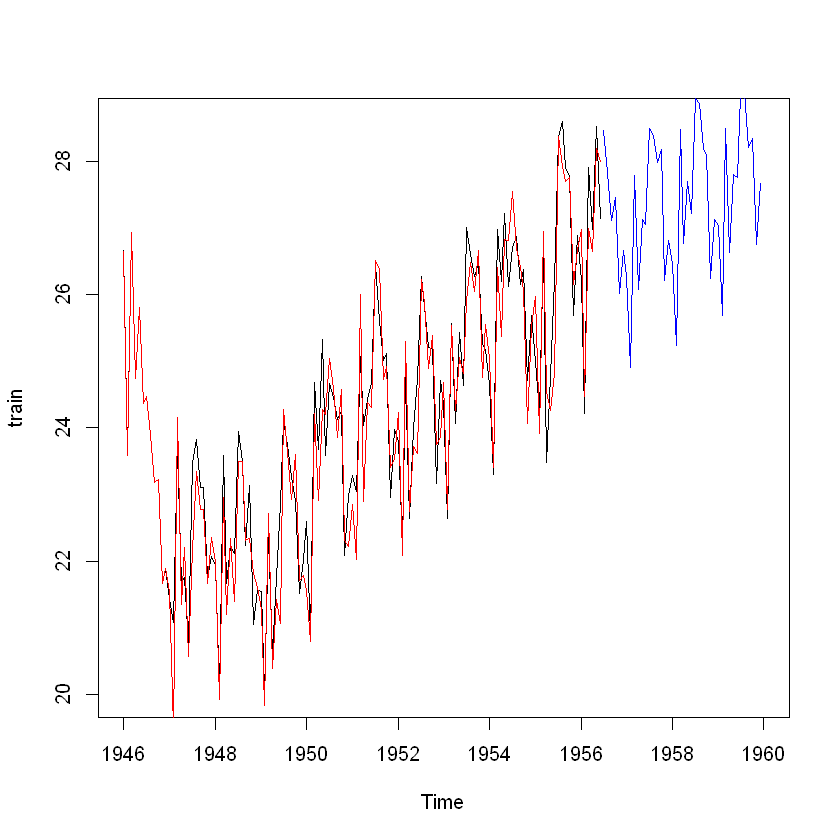

In [50]:
# 최종 선택된 모형으로 그래프 그리기 
plot(train, xlim=c(1946,1960))
lines(for_arima_1$fitted, col='red')
lines(for_arima_1$mean, col='blue')